In [56]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sn
import pandas as pd
import copy

In [57]:
with open("../data/agreement_results.pickle", "rb") as f:
    data = pickle.load(f)

In [58]:
data.keys()

dict_keys(['obj_rel_across_anim.pickle', 'obj_rel_within_anim.pickle', 'obj_rel_no_comp_within_anim.pickle', 'obj_rel_no_comp_across_inanim.pickle', 'obj_rel_no_comp_across_anim.pickle', 'subj_rel.pickle', 'obj_rel_across_inanim.pickle', 'simple_agrmt.pickle', 'obj_rel_no_comp_within_inanim.pickle', 'sent_comp.pickle'])

In [59]:
len(data.keys())

10

In [60]:
relevant = [k for k in data.keys() if "within" not in k]

In [61]:
relevant, len(relevant)

(['obj_rel_across_anim.pickle',
  'obj_rel_no_comp_across_inanim.pickle',
  'obj_rel_no_comp_across_anim.pickle',
  'subj_rel.pickle',
  'obj_rel_across_inanim.pickle',
  'simple_agrmt.pickle',
  'sent_comp.pickle'],
 7)

In [62]:
for k in copy.deepcopy(data):
    if k not in relevant:
        del data[k]

In [63]:
data.keys()

dict_keys(['obj_rel_across_anim.pickle', 'obj_rel_no_comp_across_inanim.pickle', 'obj_rel_no_comp_across_anim.pickle', 'subj_rel.pickle', 'obj_rel_across_inanim.pickle', 'simple_agrmt.pickle', 'sent_comp.pickle'])

In [64]:
sims = np.zeros((len(data.keys()), 5))
print(sims.shape)
agrt_types = ["obj_rel_across_anim", "obj_rel_across_inanim", "obj_rel_no_comp_across_anim", "obj_rel_no_comp_across_inanim", "subj_rel", "sent_comp", "simple_agrmt"]
print("test", len(agrt_types), len(data.keys()))
#agrt_type2ind = {d:i for i,d in enumerate(data.keys())}
agrt_type2ind = {d+".pickle":i for i,d in enumerate(agrt_types)}
agrt_ind2type = {i:d for d,i in agrt_type2ind.items()}

rc_type2ind = {d:i for i,d in enumerate(data["obj_rel_across_anim.pickle"].keys())}
rc_ind2type = {i:d for d,i in rc_type2ind.items()}

print(len(rc_ind2type), len(agrt_type2ind))
print(rc_ind2type)
print(agrt_ind2type)

(7, 5)
test 7 7
5 7
{0: 'src', 1: 'orc', 2: 'orrc', 3: 'prc', 4: 'prrc'}
{0: 'obj_rel_across_anim.pickle', 1: 'obj_rel_across_inanim.pickle', 2: 'obj_rel_no_comp_across_anim.pickle', 3: 'obj_rel_no_comp_across_inanim.pickle', 4: 'subj_rel.pickle', 5: 'sent_comp.pickle', 6: 'simple_agrmt.pickle'}


In [65]:
for k in data.keys():
    print(k)

obj_rel_across_anim.pickle
obj_rel_no_comp_across_inanim.pickle
obj_rel_no_comp_across_anim.pickle
subj_rel.pickle
obj_rel_across_inanim.pickle
simple_agrmt.pickle
sent_comp.pickle


In [66]:
for agreement_type in data.keys():
    for rc_type in data[agreement_type].keys():
        sims[agrt_type2ind[agreement_type], rc_type2ind[rc_type]] = data[agreement_type][rc_type]["acc_after"]

In [67]:
labels_rows = [agrt_ind2type[i].split(".")[0] for i in range(len(agrt_ind2type))]
#labels_columns = [rc_ind2type[i] for i in range(len(rc_ind2type))]

print(labels_rows)
print(labels_columns)

['obj_rel_across_anim', 'obj_rel_across_inanim', 'obj_rel_no_comp_across_anim', 'obj_rel_no_comp_across_inanim', 'subj_rel', 'sent_comp', 'simple_agrmt']
['src', 'orc', 'orrc', 'prc', 'prrc']


In [68]:
def plot(labels_rows, labels_columns, results, layer, classifier,iters):

    df_cm = pd.DataFrame(results, index = labels_rows,
                  columns = labels_columns)
    fig = plt.figure(figsize = (10,10))
    ax = sn.heatmap(df_cm, annot=True)
    #fig.set_size_inches(17, 4)
    plt.title("agreement accuracy (rows) as a function of INLP-RC-type (columns). Layer: {}. classifier: {}. {}\n (Lower values indicate greater influence of INLP)".format(layer, classifier, iters))
    #plt.show()
    ax.figure.axes[-1].yaxis.label.set_size(50)
    plt.savefig("../results/plots/agreement-interaction:{}.classifier:{}.{}.png".format(layer, classifier, iters), dpi=800)    
    plt.show()

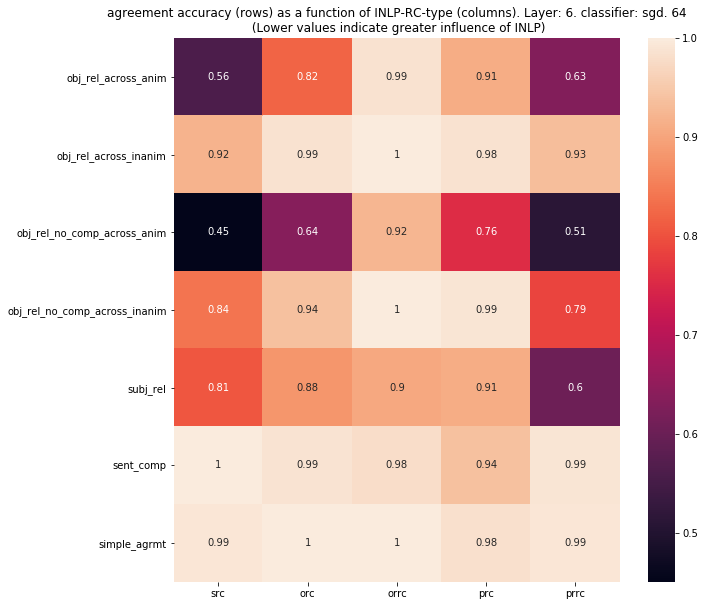

In [69]:
plot(labels_rows, labels_columns, sims, "6", "sgd", "64")

In [20]:
data["subj_rel.pickle"]

{'src': {'acc_before': 1.0,
  'acc_after': 0.806,
  'prob_good_before': 0.030351612716913223,
  'prob_bad_before': 0.00023286505893338472,
  'prob_good_after': 0.11714594811201096,
  'prob_bad_after': 0.05031014233827591},
 'orc': {'acc_before': 1.0,
  'acc_after': 0.881,
  'prob_good_before': 0.030351612716913223,
  'prob_bad_before': 0.00023286505893338472,
  'prob_good_after': 0.04218020662665367,
  'prob_bad_after': 0.009420417249202728},
 'orrc': {'acc_before': 1.0,
  'acc_after': 0.904,
  'prob_good_before': 0.030351612716913223,
  'prob_bad_before': 0.00023286505893338472,
  'prob_good_after': 0.07619847357273102,
  'prob_bad_after': 0.007624208461493254},
 'prc': {'acc_before': 1.0,
  'acc_after': 0.912,
  'prob_good_before': 0.030351612716913223,
  'prob_bad_before': 0.00023286505893338472,
  'prob_good_after': 0.25123268365859985,
  'prob_bad_after': 0.028533121570944786},
 'prrc': {'acc_before': 1.0,
  'acc_after': 0.604,
  'prob_good_before': 0.030351612716913223,
  'prob_b